## Exploratroy Data Analysis on hourly wage, gender, age, martial status,etc of Employees

### 1. Load a dataset from CSV file

The CSV File that I have chosen for my Project is "wage.csv".

1) I have used the Pandas package because it is essential for Data Manipulation and is considered as the **most powerful open source data analysis tool**.

2) Matplotlib has been imported as it a **great visualization tool for plotting graphs**.

3) Seaborn has been imported to create **visually appealing statistical graphs**.

4) Numpy has been imported into the file for further numerical calculations as it **highly advantegous for complex calculations etc**.

5) The read_csv command is used to data from a CSV file into the Data Frame.




In [1]:
    import pandas as pd #import pandas library
    import matplotlib.pyplot as plt #matplotlib for visualization
    import seaborn as sns #seaborn for statistical grpahs
    from scipy import stats #high-level Python commands 
    import numpy as np #works with arrays
    %matplotlib inline
    df = pd.read_csv("wage.csv") # read csv file 
    df.head() #present the first five rows using head function

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
0,1.0,3.24,12.0,2.0,3.0,female,white
1,0.0,3.00,11.0,0.0,2.0,male,white
2,1.0,6.00,8.0,28.0,0.0,male,white
3,1.0,5.30,12.0,2.0,1.0,male,white
4,1.0,8.75,16.0,8.0,0.0,male,white


### 2. Display descriptive statistics about the dataset

Descriptive Statistics is performed in order to summarize  and interpret the information in the data set 'Wages'.

The **describe function is used to achieve this data and measures the summary statistics**

In [2]:
df.describe() #Run the describe function

,married,hourly_wage,years_in_education,years_in_employment,num_dependents
count,522.000000,517.000000,522.000000,519.000000,520.000000
mean,0.609195,5.917737,12.557471,5.152216,1.044231
std,0.488399,3.699058,2.757219,7.257133,1.258484
min,0.000000,0.530000,0.000000,0.000000,0.000000
25%,0.000000,3.350000,12.000000,0.000000,0.000000
50%,1.000000,4.670000,12.000000,2.000000,1.000000
75%,1.000000,6.880000,14.000000,7.000000,2.000000
max,1.000000,24.980000,18.000000,44.000000,6.000000


From the above table, we can interpret some of the important statistics of the dataset such as:

1) The **average  hourly wage of all employees is around 5.9**.

2) The **average number of years spent in education is around 12.5 years**.

3) The **average number of years spent in employment is around 5.15 years**.

### 3. Build a graph visualizing (some of) the numerical variables of the dataset

Visualization is a great way to understand our data in depth and is one of the most important steps of exploratory data analysis. 

#### Bar Graph to display the hourly wage of genders on the basis of their race

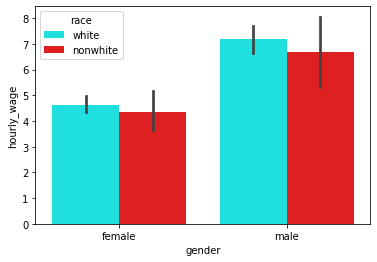

In [3]:
hue_colour={"white":"cyan","nonwhite":"red"} #Specify hue colours
sns.barplot(x='gender',y='hourly_wage',hue ='race',data=df,palette=hue_colour) #assign variables
plt.show() #display the graph

1)The barplot above clearly depcits that the hourly wage of female employees are much lower than that of male employees.

2)The white people earn more than non white people in both the categories.

#### Box plot to visualize gender and hourly_wage


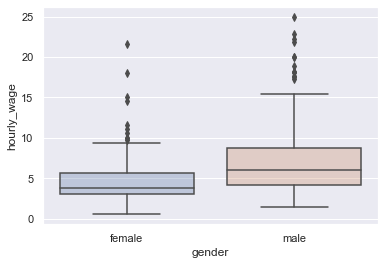

In [4]:
# libraries & dataset
sns.set(style="darkgrid")
 
# usual boxplot, plotted on a matplotlib.axes object named ax
ax = sns.boxplot(x='gender', y='hourly_wage', data=df)
 
# adding transparency to colors
for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .3))

plt.show()

From the above graph, we can interpret that:

1)The boxplot above shows that there are certain outliers in the dataset which are formed outside the whiskers . 

2)The median line of the male box plot lies outside the female box plot, which means there is likely to be a difference between the two genders in terms of hourly wage.

3)The female box plot displays the data as positively skewed (skewed to the right)



#### Jointplot to visualize distributions of hourly wage and years in employment

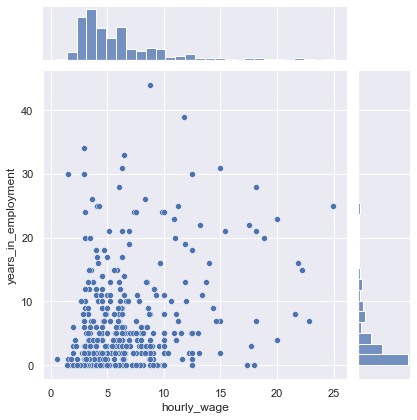

In [5]:

# Custom the histogram:
sns.jointplot(x=df["hourly_wage"], y=df["years_in_employment"])

plt.show()

The joint plot above shows the relationships of hourly wage and the years in employment and  distributions of these data are  on the same plot

We can interpret that:

If the years spent in employment is less, the hourly wage is also low.


#### Scatterplot to visualize the number of years spent in education and employment 

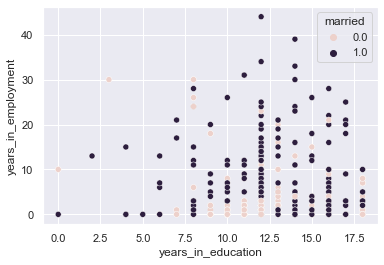

In [6]:

sns.scatterplot (x= "years_in_education",y="years_in_employment",data=df,hue="married") #Customize the scatterplot
plt.show()

From the above scatterplot, we can interpret that:
1) Most of the people are married

2) Some of the married people have spent more number of years in employment compared to the unmarried people.

3) Overall, some of  the unmarried people have spent most number of years in education rather than employment.

### 4. Check if any records in the data have any missing values; handle the missing data as appropriate(interpolate missing values, delete records with missing values, etc).

Missing values are very important to interpret as they are used to successfully manage the data once removed.


The first step here is to check how many missing values are under each column

In [7]:
df.isnull().sum() #Number of missing values for each column

married                 3
hourly_wage             8
years_in_education      3
years_in_employment     6
num_dependents          5
gender                  4
race                   10
dtype: int64

The function below is used to understand the total number of missing values in the whole dataset

In [8]:
df.isnull().sum().sum() # Total number of missing values

39

I have used interpolate method below to project the missing data and have interpreted a mean between the values before and after the missing data

In [9]:
df['hourly_wage'].interpolate(method ='linear',direction ='forward',inplace =True) #Interpolate Method function performed
print(df['hourly_wage'])

0       3.24
1       3.00
2       6.00
3       5.30
4       8.75
       ...  
520    15.00
521     2.27
522     4.67
523    11.56
524    11.56
Name: hourly_wage, Length: 525, dtype: float64


In [10]:
df['hourly_wage'].isnull().sum() #Check if there are any null values for the column 'hourly_wage'

0

In [11]:
df.count() #Count all the records in the dataset

married                522
hourly_wage            525
years_in_education     522
years_in_employment    519
num_dependents         520
gender                 521
race                   515
dtype: int64

The  function used below is used to **drop the missing values** for all the columns in order to have equal number of records in the dataset

In [12]:
df.dropna(inplace=True,axis="rows") #Drop the null values

In [13]:
df.count() #Check the number of records for each column in the dataset

married                495
hourly_wage            495
years_in_education     495
years_in_employment    495
num_dependents         495
gender                 495
race                   495
dtype: int64

Finally, I checked the total number of missing values in the whole dataset.



In [14]:
df.isnull().sum().sum() #Check if there are any missing values in the dataset.

0

This dataset is now converted into a very convenient format, now the dataset and analysis can be processed further to produce best results and output.

### 5. Display the distribution of (some of) numerical variables as histograms. Provide verbal comments on the graph.


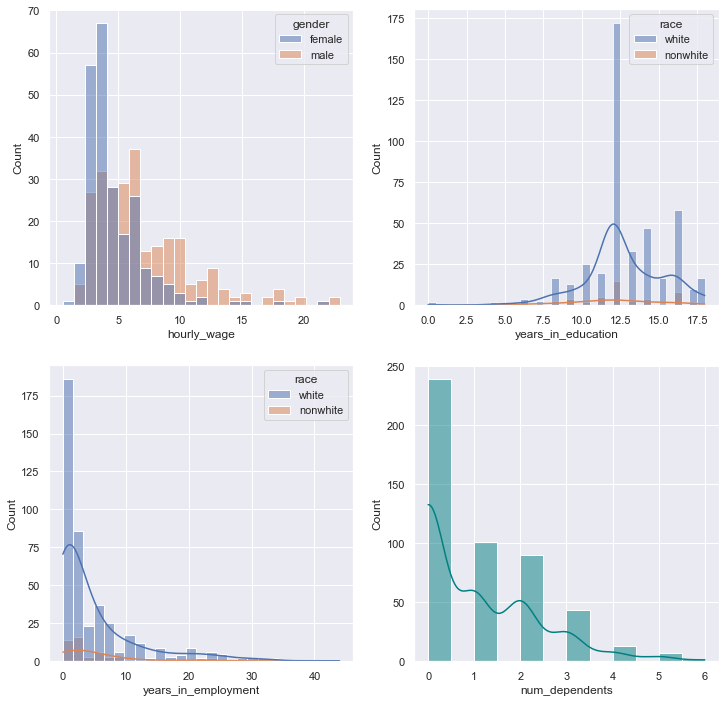

In [15]:
sns.set(style='darkgrid')  #Set the seaborn style method
fig,axs = plt.subplots(2,2, figsize=(12,12)) #Updating the subplots figure size
sns.histplot(data=df, x='hourly_wage',color ='skyblue',hue = "gender",ax =axs[0,0]) #Creation of first histogram
sns.histplot(data=df, x='years_in_education',kde=True,color ='olive',hue ="race",ax =axs[0,1])#Creation of second histogram
sns.histplot(data=df, x='years_in_employment',kde=True,color ='gold', hue = "race", ax =axs[1,0])#Creation of third histogram
sns.histplot(data=df, x='num_dependents',kde=True,color ='teal', ax =axs[1,1])#Creation of fourth histogram

plt.show()

1.The first histogram displays the hourly wage of males and females. We can interpret that the hourly wage of females is much lower than their male counterparts. The hourly wage for females is most likey between 4 - 7 pounds an hour.

2.The second histogram displays the years in education of white and non-whites. It is evident from the histogram that the number of white people have spent more years in education and most of them have studied for around 12.5 years

3.The third historgam interprets the number of years spent in employment by whites and non whites. It is evident that white people have spent more number of years in employment.

4.The fourth histogram displays the occurences of the number of dependents in the data and is evident that there are less number of dependents for males and females.

### 6. Display unique values of a categorical variable.


The .value_counts() function extracts the unique instanced from each column.


This function is a part of the data exploration process which is used in order to gain inisights of certain variables from the datset. 

The categorical variables in Wages dataset are 'Married', 'gender' and 'race' under the Wages dataset.

In [16]:
df['married'].value_counts() #Function to display unique occurences under the marriage column


1.0    300
0.0    195
Name: married, dtype: int64

In [17]:
df['gender'].value_counts()  #Function to display unique occurences under the gender column


male      258
female    237
Name: gender, dtype: int64

In [18]:
df['race'].value_counts()  #Function to display unique occurences under the race column

white       442
nonwhite     53
Name: race, dtype: int64

### 7. Build a contingency table of two potentially related categorical variables. Conduct a statistical test of the independence between the variables. Provide verbal comments on the output.


To perform a statistical test, it is necessary to frame a contigency table, which shows how often **different categorical variables occur in the dataset and is used outline the relationship between the categorical variables that we are going to test**.

In [19]:
data_contigency = pd.crosstab(df['gender'], df['race']) #Cross tab function supplies the two series as arguments
data_contigency

race,nonwhite,white
gender,,
female,24,213
male,29,229


The contigency table represents the observed frequencies of co-occurences of different values of brand and gender.

For eg, The table summarizes the following:

1)There are 24 non-white females.

2)There are 213 white females.

3)There are 29 non-white males.

4)There are 229 white males

We can visualize the contents of a dataframe as a stacked bar as well.

<AxesSubplot:xlabel='gender'>

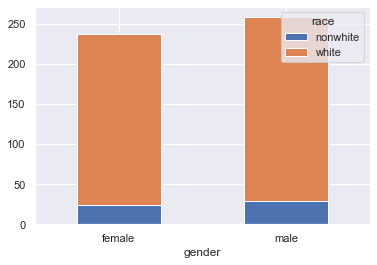

In [20]:
data_contigency.plot(kind = 'bar', stacked =True, rot =0) #Stacked Bar function for contigency table

From the above graph, we can interpret that there are  **more number of white males and females**.

### Chi-square Test of Independence

In this project, we are using the chi-square statistical test to regulate if the categorical  variables are independent or not.

The null Hypothesis for my dataset will be : There is no relationship between the variables; they are independent.

The alternate Hypothesis for my datatset will be : There is relationship between the variables; they are dependent.

In [21]:
chi2, p_val, dof, expected = stats.chi2_contingency(data_contigency) #Chi-square test of independence for contigency table
print(f"p-value: {p_val}")

p-value: 0.7988507542232299


The p-value is greater than the usual significance value 0.05 . Therefore, **we accept the null hypothesis that there  is no relationship between the genders and race**. 

In other words, we can say that  number of males and females in the dataset does not help to predict the race of the genders

### 8. Retrieve a subset of the data based on two or more criteria and present descriptive statistics on the subset. Provide verbal comments on the output.

The criteria that have considered are  non white males where the number of dependents are greater than 1 in the dataset.

The descriptive statistics  function used here will summarize details about the criteria considered in the datset.

In [22]:
df[(df.gender =='male') & (df.race == 'nonwhite') & (df.num_dependents>=1)].describe()
#Describe function used to present summary statistics for non white males

,married,hourly_wage,years_in_education,years_in_employment,num_dependents
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.888889,7.524444,12.666667,5.166667,1.888889
std,0.323381,3.919142,3.143621,5.607243,1.450715
min,0.000000,2.380000,8.000000,0.000000,1.000000
25%,1.000000,4.535000,10.250000,2.000000,1.000000
50%,1.000000,6.355000,12.000000,3.000000,1.000000
75%,1.000000,9.962500,15.500000,7.000000,2.000000
max,1.000000,15.000000,18.000000,24.000000,6.000000


In [23]:
df[(df.gender =='male') & (df.race == 'white') & (df.num_dependents>=1)].describe()
#Describe function used to present summary statistics for white males

,married,hourly_wage,years_in_education,years_in_employment,num_dependents
count,107.000000,107.000000,107.000000,107.000000,107.000000
mean,0.831776,7.759813,12.654206,7.018692,2.121495
std,0.375826,4.965366,2.933550,7.349729,1.096394
min,0.000000,1.670000,4.000000,0.000000,1.000000
25%,1.000000,3.975000,12.000000,1.000000,1.000000
50%,1.000000,6.290000,12.000000,5.000000,2.000000
75%,1.000000,9.110000,15.000000,11.000000,3.000000
max,1.000000,22.860000,18.000000,28.000000,6.000000



Non White Males have an average hourly wage of 7.52 which is good considering the number of years they have spent in education.

There is not much of a difference between the hourly wage for non white males and white males , however, white males still earn more than non white males.

But white males have spent more number of years spent in employment that non white males and number of years spent in education is considerably same for both.

### 9. Conduct a statistical test of the significance of the difference between the means of two subsets of the data. Provide verbal comments.

To conduct a statisitcal test of the significance of the difference between the means of two subsets of the data, Independent two samples t-test which is an inferential statistical test determines if there is a significance difference between the means of two populations from the dataset.

From my dataset, I am going to first consider 2 subsets which are  **(i) female and hourly wage (ii) male and hourly wage**.

In [24]:
# Subset female and hourly wage
female_wages = df['hourly_wage'][(df.gender == 'female')]
female_wages.mean()

4.675126582278481

In [25]:
#Subset female and years in employment
male_wages = df['hourly_wage'][(df.gender == 'male')]
    
male_wages.mean()


7.072984496124034

### Formulate the null hypothesis and the alternative hypothesis


Our null hypothesis is that either the difference between the two population means equals 0, i.e. there is no difference between them. 

The alternative hypothesis is that there is difference between the hourly wage of male and females

H0: μ = 0

Ha: μ ≠ 0

Significance Level = 0.05

In [26]:
t_val, p_val = stats.ttest_ind(female_wages, male_wages) #Compute the independent 2 sample t-test

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: -7.766653604855619, p-value: 4.705097588922886e-14


The p-value is smaller than the significance level ( 𝛼=0.05 ), i.e., the difference between the two means falls inside the rejection area.

Therefore we reject the null hypothesis that the mean of female's population wages is not different from the male's population wage in years. 

In  other words, we can conclude  that the male employees earn higher than female employees.




###  10. Create pivot tables, i.e., create a table that groups the data by a certain categorical variable and displays summarized information for each group (e.g. the mean or sum within the group). Provide verbal comments.

In [27]:
hourly_wage = pd.pivot_table(df,index =['gender','race'],values=['hourly_wage', 'years_in_education','num_dependents'],aggfunc =np.mean)
#Pivot table to organize the data structure by certain categorical variables
hourly_wage 

hourly_wage  num_dependents  years_in_education
gender race                                                     
female nonwhite     4.796458        1.416667           12.375000
       white        4.661455        1.004695           12.314554
male   nonwhite     6.700345        1.172414           11.517241
       white        7.120175        0.991266           12.969432

(i) The hourly wage for white males is higher than non white males and females and it can also be interpreted that white males spent most number of years in education and they have the lowest average number of dependents amongst all which helps them to work and concentrate  on themselves better.

(ii) The average hourly wage for nonwhite males are higher than females even though they spent less number of years in education than females.

(iii) The hourly wage of all the females regardless of their colour are generally less than all the males in the dataset even if they spent more number of years in education that non white males.

(iv) We can conclude that there is a **slight gender pay gap** where males earn higher than females.





### 11. Implement a linear regression model and interpret its output.

### Simple Linear Regression 

Linear regression is used to observe how one variable is dependent on other variables to forecast a model.


In [28]:
# Import the libraries required for simple linear regression
import pandas as pd
import statsmodels.api as sm

Bokeh is used in order to plot figures 

In [29]:
from bokeh.io import output_notebook
output_notebook()

from bokeh.plotting import figure
from bokeh.io import show

Loading BokehJS ...

In [30]:
df.head(5)

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
0,1.0,3.24,12.0,2.0,3.0,female,white
1,0.0,3.00,11.0,0.0,2.0,male,white
2,1.0,6.00,8.0,28.0,0.0,male,white
3,1.0,5.30,12.0,2.0,1.0,male,white
4,1.0,8.75,16.0,8.0,0.0,male,white


In a simple linear regression model, we’d like to predict the hourly wage  for people  from the average number of years_in_employment. That is, hourly_wage is the dependent variable (Y) and years_in_employment is the independent variable (X).

Let's first visualize the relationship between them.

In [31]:
fig = figure(height=400, width=400)
fig.circle(df['years_in_employment'], df['hourly_wage'] )
show(fig)

There seems to be a relationship between X and Y, and it appears it can be fit by a line.

We can also check the correlation between them:

In [32]:
df['years_in_employment'].corr(df['hourly_wage']) #Function to check the correlation

0.33602901200802365

The correlation coefficient also suggests there is a positive relationship between the variables.

To build a linear regression model with statsmodel, we use the following syntax. The model is defined by a formula, where first comes the Y variable, followed by the tilda sign (`~`), followed by the X variable. Incidentally, the same syntax to define a regression equation in the R language.

We need to call the `fit` method to fit and output the actual model.

In [33]:
model = sm.OLS.from_formula('hourly_wage ~ years_in_employment', data=df).fit() # Model to check the best fit in simple linear regression

We can plot the fitted line. To do that, we first obtain the intercept and the slope - they are available in the `params` attribute of the fitted model.

In [34]:
intercept, slope = model.params
print(intercept)
print(slope)

5.068623308727393
0.16833457592531406


Next, we can obtain predicted values for Y, given the X values, using the intercept and the slope:

In [35]:
y_pred = [slope*i + intercept  for i in df['years_in_employment']] #Check the predicted values

We can now plot the fitted line:

In [36]:
fig = figure(height=400, width=400)
fig.circle(df['years_in_employment'], df['hourly_wage'])
fig.line(df['years_in_employment'], y_pred, color='red')
show(fig)

### Interpreting the model
To interpret the model, we access the model summary. In statsmodels, it consists of three tables:

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            hourly_wage   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     62.75
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           1.57e-14
Time:                        01:50:04   Log-Likelihood:                -1310.6
No. Observations:                 495   AIC:                             2625.
Df Residuals:                     493   BIC:                             2634.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.0686      0.188     26.952      0.000       4.699       5.438
years_in_employment     0.1683      0.021      7.922      0.000       0.127       0.210
==============================================================================
Omnibus:                      182.361   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              619.700
Skew:                           1.715   Prob(JB):                    2.72e-135
Kurtosis:                       7.276   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The elements of the summary that are of main interest for us at the moment are:

(1) **Coefficients on the variables**. These are shown in the second table of the summary. The "coef" column shows the actual coefficients: 5.0686 for the intercept, and 0.1683 for the years_in_employment variable. Thus, our model is described by the line: $hourlywage = 5.0686 + 0.1683*yearsinemployment + e$.

(2) **Significance of the variables**. The summary includes results of a t-test assessing if the estimated coeffients are significantly different from 0. If they were not different from 0, that would mean that the variable itself has no effect on the dependent variable, and can be deleted from the model. The significance can be judged from the p-value associated with the t-test. In the table, we see that the intercept and coefficient on years_in_employment and  is  significant (p=0.000, that is less than the  significance level of 0.05). Therefore, they do have an effect on the dependent variable .

(3) **Quality of the model**. The $R^2$ and the adjusted $R^2$ values are shown in the first table. Both are around 0.1, which indicates that the model is quite far from perfect. Obviously, there are other factors that affect the hourly_wage that our model did not take into account.

## Checking the assumptions of normality and zero mean of residuals

Two of the main assumptions of linear regression is that the residuals (i.e., errors, the differences between the true and fitted values of $y$) are equally scattered around zero, and that the errors are normally distributed. 

We can plot the error values to confirm if these assumptions are valid for our model. The "raw" residuals are available as the `resid` attribute of the model object. However, it is often more useful to look at standardized residuals (standardized residuals are residuals divided by their standard deviation, which helps to detect outliers and compare plots from different models).

The plot below shows the relationship between standardized residuals and the fitted values for the dependent variable.

In [38]:
fig = figure(height=400, width=400)

# the x axis is the fitted values
# the y axis is the standardized residuals
st_resids = model.get_influence().resid_studentized_internal
fig.circle(model.fittedvalues, st_resids)

show(fig)

We see that the residuals are randomly scattered around zero, and there is no apparent pattern to the residuals, which suggests that a linear model is appropriate for this relationship (if there was a pattern, such as a U-shape, this would indicate a non-linear relationship).

We can also build a histogram of the standardized residuals:

In [39]:
import numpy as np

# create a histogram with 10 bins
hist, edges = np.histogram(st_resids, bins=10)

In [40]:
fig = figure(height=400, width=400)
fig.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
show(fig)

If we look at the third table in the summary of the model, it contains the results of the Jarque-Bera test on the residuals, which tests for the normality of their distribution. The p-value of the Jarque-Bera statistic is 2.72e-135, which means that we would reject the null hypothesis of normally distribution of errors at the 0.1 significance level and also reject it at the 0.05 level. In other words, this is not a normal distribution


### Multiple Linear Regression 

In this model, we establish the relationship of  several independent variables such as years_in_education, years_in_employment, num_dependents, gender, race and married and determine how it impacts our dependent variable which is hourly_wage. 

Multiple Linear Regression is performed because the model contains more than one independent variable.

In this model, we will check which variables have a good impact on the hourly wage of people

In [41]:
#Import all the libraries required to perform the regression
import statsmodels.api as sm
from bokeh.io import output_notebook # Bokeh is imported because the graphs are visually appealing 
output_notebook()

from bokeh.plotting import figure
from bokeh.io import show

Loading BokehJS ...

In this step, we are replacing all the categorical variables to binary variables for multiple regression. If they remain categorical variables then this might cause problems.

In [42]:
#Replace function is used to convert categorical to binary variables
df['gender'] = df['gender'].replace('female',1)
df['gender'] = df['gender'].replace('male',0)
df['race'] = df['race'].replace('white',0)
df['race'] = df['race'].replace('nonwhite',1)

In [43]:
df.head(3) # Check the first 3 rows of the dataset

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
0,1.0,3.24,12.0,2.0,3.0,1,0
1,0.0,3.00,11.0,0.0,2.0,0,0
2,1.0,6.00,8.0,28.0,0.0,0,0


We are going to estimate the model using OLS:

$hourlywage = \alpha + \beta_1*yearsinemployment + \beta_2*gender + \beta_3*yearsineducation +\beta_4*race+ \beta_5*numdependents + \beta_6*married$



    

In [44]:
model = sm.OLS.from_formula(
    'hourly_wage ~ years_in_employment + gender + years_in_education + race+ num_dependents + married', data=df).fit() 
#Use the OLS method to check if the model is best fit

### Interpreting the model

In [45]:
model.summary() #Method is used to find out the OLS Regression Results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            hourly_wage   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     45.43
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           3.69e-44
Time:                        01:50:05   Log-Likelihood:                -1230.4
No. Observations:                 495   AIC:                             2475.
Df Residuals:                     488   BIC:                             2504.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.2558      0.706     -1.778      0.076      -2.644       0.132
years_in_employment     0.1490      0.019      7.824      0.000       0.112       0.186
gender                 -1.6449      0.271     -6.071      0.000      -2.177      -1.113
years_in_education      0.5269      0.049     10.777      0.000       0.431       0.623
race                    0.2090      0.429      0.487      0.626      -0.633       1.051
num_dependents          0.1388      0.110      1.265      0.206      -0.077       0.354
married                 0.6926      0.286      2.422      0.016       0.131       1.254
==============================================================================
Omnibus:                      186.785   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              728.175
Skew:                           1.696   Prob(JB):                    7.57e-159
Kurtosis:                       7.878   Cond. No.                         77.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Significance Value = 0.05

Based on the above result, we check the **P Value**, if the P value is less than significant level (0.05), we can assume that they have a good impact on the dependent variable.

If the P value is greater than significant level(0.05), it does not have an impact which suggests that we can remove those variables from the model.

Firstly, I will remove race as this has a high value of 0.626



### Checking the line of best fit after removing race

In [46]:
model = sm.OLS.from_formula(
    'hourly_wage ~ years_in_employment + gender + years_in_education + num_dependents + married', data=df).fit() 
#Use the OLS method to check if the model is best fit

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            hourly_wage   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     54.56
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           5.32e-45
Time:                        01:50:05   Log-Likelihood:                -1230.5
No. Observations:                 495   AIC:                             2473.
Df Residuals:                     489   BIC:                             2498.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.2119      0.700     -1.731      0.084      -2.587       0.164
years_in_employment     0.1492      0.019      7.844      0.000       0.112       0.187
gender                 -1.6489      0.271     -6.093      0.000      -2.181      -1.117
years_in_education      0.5255      0.049     10.776      0.000       0.430       0.621
num_dependents          0.1423      0.109      1.302      0.194      -0.073       0.357
married                 0.6829      0.285      2.396      0.017       0.123       1.243
==============================================================================
Omnibus:                      185.864   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              719.597
Skew:                           1.690   Prob(JB):                    5.52e-157
Kurtosis:                       7.844   Cond. No.                         76.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model above shows that the P value for  num_dependents column is still above significant level (0.05), hence we can remove that variable and check the model again to achieve optimal results

### Model of best fit after removing num_dependents

In [48]:
model = sm.OLS.from_formula(
    'hourly_wage ~ years_in_employment + gender + years_in_education + married', data=df).fit() 
#Use the OLS method to check if the model is best fit

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            hourly_wage   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     67.68
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           1.40e-45
Time:                        01:50:05   Log-Likelihood:                -1231.4
No. Observations:                 495   AIC:                             2473.
Df Residuals:                     490   BIC:                             2494.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.9190      0.663     -1.385      0.167      -2.222       0.384
years_in_employment     0.1477      0.019      7.774      0.000       0.110       0.185
gender                 -1.6442      0.271     -6.072      0.000      -2.176      -1.112
years_in_education      0.5107      0.047     10.760      0.000       0.417       0.604
married                 0.7554      0.280      2.700      0.007       0.206       1.305
==============================================================================
Omnibus:                      187.490   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              736.242
Skew:                           1.700   Prob(JB):                    1.34e-160
Kurtosis:                       7.913   Cond. No.                         72.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The P value is less for all the variables above with the P values being less than the significant value (0.05)

The optimal model has been acheived now with the independent variables being **years_in_employment, gender, years_in_education and married**.

(1) **Coefficients on the variables**. The estimated coefficients are specified in the second table. Our model is thus described by the line: 

$hourlywage = -0.9190 + 0.1477*yearsinemployment - 1.6442*gender + 0.5107*yearsineducation +0.7554*married + e$.

Considering the signs on the coefficients we can state that the hourly wage  is positively affected by all the variables a (for example:the greater the years_in_employment, the greater is the hourly_wage) and negatively affected by the gender variable.

(2) **Significance of the variables**. The p-values on all the coefficients, except the intercept and gender   indicate that the variables are significant, i.e., the other factors do have a significant effect on the hourly_wage.

(3) **Quality of the model**. The $R^2$ and the adjusted $R^2$ values have gone up from the 0.1 rate of the simple linear regression to around 0.3. This indicates that the addition of extra independent variables has helped to improve the model. 


 

## Checking the assumptions of normality and zero mean of residuals

Residual analysis checks if there is any unusual data patterns left. We can plot the standard residuals and histogram to confirm the assumptions of normality distribution and the zero mean of residuals and we can conclude if they are valid with this model or not.

In [50]:
fig = figure(height=400, width=400)

# the x axis is the fitted values
# the y axis is the standardized residuals
st_resids = model.get_influence().resid_studentized_internal
fig.circle(model.fittedvalues, st_resids)

show(fig)

We see that the residuals are randomly scattered around zero, and there is no apparent pattern to the residuals, which suggests that a linear model is appropriate for this relationship (if there was a pattern, such as a U-shape, this would indicate a non-linear relationship).

We can also build a histogram of the standardized residuals:

In [51]:
# create a histogram with 10 bins
hist, edges = np.histogram(st_resids, bins=10)
fig = figure(height=400, width=400)
fig.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
show(fig)

The scatterplot and the histogram suggest the residuals are not equally distributed around 0 and are not  normally distributed. The results of the Jarque-Bera test on the residuals (the third table of the summary) also indicate that the errors are not distributed normally:the p-value equals 1.34e-160, therefore we reject the null hypothesis of normal distribution.

Thus, the addition of the extra variables not only improved the quality of the model, but also ensured that the assumptions of the classical linear regression method hold with the model.

To conclude, **our model is not a good fit to predict the hourly wage of employees. We need to identify more characteristics that would be significant to predict the hourly wage of the employees**.